# Single Neuron Percpetron
___
A single-neuron perceptron is a simple binary classifier in machine learning. It functions as follows:

1. The perceptron receives input features $x_1, x_2, ..., x_n$ and associated weights $w_1, w_2, ..., w_n$.

2. It calculates the weighted sum of inputs: $z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$, where $b$ is the bias term.

3. The output is determined by an activation function $f(z)$, typically a step function:
   $$
   f(z) = \begin{cases}
   1 & \text{if } z > 0 \\
   0 & \text{otherwise}
   \end{cases}
   $$

4. During training, weights are adjusted to minimize classification errors.

Benefits:
- Simple and computationally efficient
- Effective for linearly separable data
- Can perform basic logic operations like AND, OR, and NOT

Limitations:
- Can only classify linearly separable data
- Limited to binary classification
- Unable to solve complex problems like XOR
- Cannot handle non-linear decision boundaries

The perceptron's simplicity makes it a foundational model in neural networks, but its limitations led to the development of more advanced architectures.
___

**Dataset**: Penguins

In [17]:
# Import Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from em_el.classifiers import PerceptronClassifier
from em_el.neuron import SingleNeuron

In [8]:
# Load Data
penguins = sns.load_dataset('penguins')
print("# Observations: ", len(penguins))
print("Classes: ", penguins['species'].unique())

# Observations:  344
Classes:  ['Adelie' 'Chinstrap' 'Gentoo']


In [10]:
# Get only desired species and features
df = penguins[penguins['species'] != 'Chinstrap'].dropna()  # Remove the Chinstrap penguins
df_clean = df[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [12]:
gentoo = df_clean[df_clean.species == 'Gentoo']
adelie = df_clean[df_clean.species == 'Adelie']

print("Gentoo Shape: ", gentoo.shape)
print("Adelie Shape: ", adelie.shape)

Gentoo Shape:  (119, 5)
Adelie Shape:  (146, 5)


In [13]:
X = df_clean[['bill_length_mm', 'bill_depth_mm']].to_numpy()
y = df_clean['species'].to_numpy()
y = np.where(y == 'Gentoo', -1.0, 1.0).reshape(-1, 1)

print(f"X shape {X.shape}")
print(f"y shape {y.shape}")

# Scale Data
X = StandardScaler().fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X shape (265, 2)
y shape (265, 1)


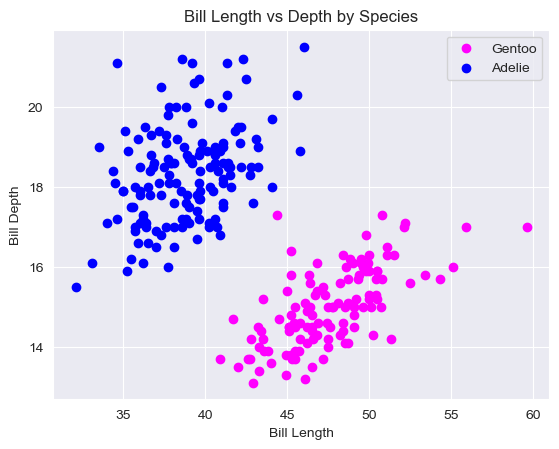

In [14]:
plt.scatter(gentoo.bill_length_mm, gentoo.bill_depth_mm, color="magenta", label="Gentoo")
plt.scatter(adelie.bill_length_mm, adelie.bill_depth_mm, color="blue", label="Adelie")

plt.xlabel('Bill Length')
plt.ylabel('Bill Depth')
plt.title('Bill Length vs Depth by Species')
plt.legend()
plt.show()

In [15]:
class Perceptron(object):
    """
    Single Neuron
    """
    
    def __init__(self, eta = 0.001, epochs = 50):
        self.eta = eta
        self.epochs = epochs
        
        
    def train(self, X, y):
        self.w = np.random.rand(X.shape[1])
        self.b = np.random.rand()
        self.errors_ = []
        
        for _ in range(self.epochs):
            error = 0
            for x_i, y_i in zip(X, y):
                update = self.eta * (self.predict(x_i) - y_i)
                self.w -= update*x_i
                self.b -= update
                error += np.int_(update != 0)
            self.errors_.append(error)
                
                
    def net_input(self, x):
        return np.dot(x, self.w) + self.b
    
    def predict(self, x):
        return np.where(self.net_input(x)>=0.0, 1, -1)
        

In [16]:
percep = Perceptron(epochs = 10000)
percep.train(X_train, y_train)

In [22]:
y_hat = percep.predict(X_test)

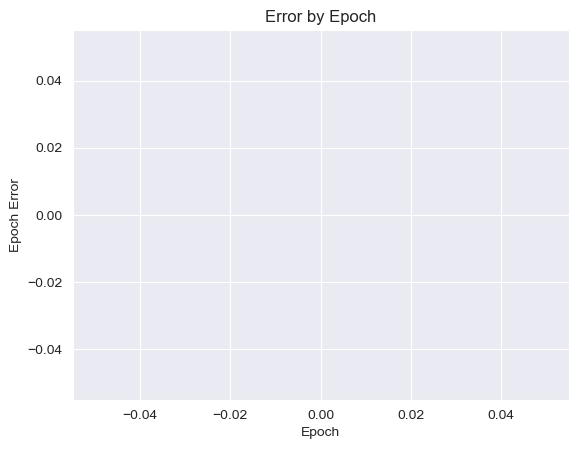

In [24]:
plt.plot(percep.errors_)
plt.xlabel("Epoch")
plt.ylabel("Epoch Error")
plt.title("Error by Epoch")
plt.show()

In [ ]:
y_hat

In [20]:
classification_success = np.mean(np.int_(y_hat == y_test))
classification_error = 1 - classification_success
print(classification_error)

0.48906249999999996
